# Ensemble Learning

## Introduction

<table>
    <tr>
        <td><img src="https://media.giphy.com/media/AYLNzUe39OSgE/giphy.gif" width="350"/></td>
        <td><img src="https://media3.giphy.com/media/CYTyHRkPkVtJe/giphy.gif" width="350"/></td>
    </tr>
</table>

To date, we have discussed fitting a single hypothesis to a particular dataset. What about combining several models into one?

### What is it?

It is a meta-model that combines several learners by voting or averaging and works for both regression and classification problems.

First 

Other Names:
 * Committee-based learning
 * Multiple classifier/regressor system
 * Combination learning
 
Like neural networks, the idea is to leverage a bunch of simple models to build a more complicated model.
 
Do not confuse it with __partition-based models__
 * local models are used to describe specific regions (That is a different [talk](https://www.cs.utah.edu/~maljovec/files/partitionBasedRegression.pdf)):
   * Decision trees
   * Morse-Smale Regression

### Why use it?

 * Provides better __generalization__ for weak learners who tend to overfit (whole is greater than sum of its parts)
 * Squeezing more performance out of a less performant model
 * __uncertainty modeling__ - Provides richer statistical context, think of the variance of the predictors
 * One model just isn't enough (e.g., testing different hypotheses)

### How to build one and use it?

 * Works better when the models are diverse
 * How many models? https://arxiv.org/pdf/1709.02925.pdf
 * Hopefully the rest of the talk answers this question

Let $h_i(x)$ be a single learner:

Unweighted averaging (for regression):

$H(x) = \frac{\sum_{i=0}^n h_i(x)}{n}$

Majority voting (for classification):

$H(x) = \text{mode}\left(\left[h_1(x), h_2(x)... , h_n(x)\right]\right)$

### Terminology

 * __weak learner__ - just slightly better than random guessing
 * __strong learner__ - better than a weak learner

## Motivating Example

Try to fit the logarithmic function $log(x)$ with low to moderate polynomials (1-10):

(-10, 5)

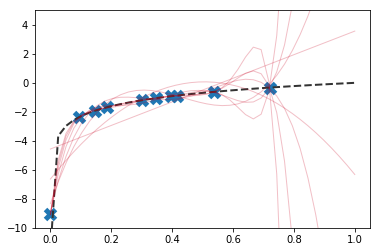

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

def test_function(x):
    return np.log(x)

np.random.seed(1)
num_samples = 10
num_models = 10
train_x = np.random.rand(num_samples)
train_x = train_x.reshape(-1, 1)
train_y = test_function(train_x)

test_x = np.linspace(1e-5, 1, 40)
test_y = test_function(test_x)

plt.plot(train_x, train_y, marker='x', linewidth=0, ms=10, mew=5)
plt.plot(test_x, test_y, linewidth=2, linestyle='--', c='#333333')

poly_predict_y = np.zeros((len(test_x), num_models))

for i, degree in enumerate(range(1,num_models-1)):
    weak_learner = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    weak_learner.fit(train_x, train_y)

    poly_predict_y[:, i] = weak_learner.predict(test_x.reshape(-1, 1)).T

    plt.plot(test_x, poly_predict_y[:, i], linewidth=1, linestyle='-', c='#ca0020', alpha=0.25)

plt.gca().set_ylim(-10, 5)



Let's try averaging the results:

(-10, 5)

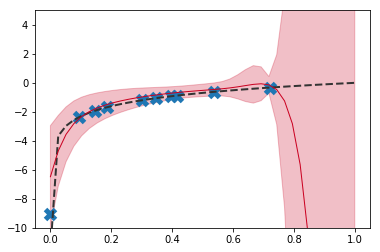

In [141]:
plt.plot(train_x, train_y, marker='x', linewidth=0, ms=10, mew=5)
plt.plot(test_x, test_y, linewidth=2, linestyle='--', c='#333333')
average_y = np.average(poly_predict_y, axis=1)
std_y = np.std(poly_predict_y, axis=1)

plt.fill_between(test_x, average_y-std_y, average_y+std_y, color='#ca0020', alpha=0.25)
plt.plot(test_x, average_y, linewidth=1, linestyle='-', c='#ca0020')
plt.gca().set_ylim(-10, 5)

## Boostrap Aggregation (Bagging)

 * Improves stability
 * Improves accuracy
 * Reduces variance (overfitting)
 
Each model is built on a subset of the data (of equal size $n'$) (a __bootstrap__ sampling). Samples are selected uniformly with replacement. Then the models are __aggregated__ into a single prediction.

Thus, some examples will have repeated data points.

Also, each model is kind of "sand-bagging it" to prevent it from overfitting at the individual learner level.

(-10, 5)

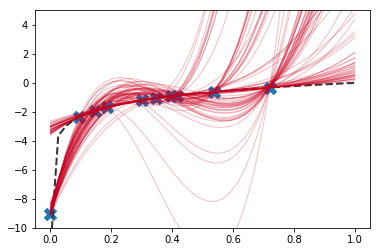

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

def test_function(x):
    return np.log(x)

np.random.seed(1)
num_samples = 10
num_models = 100
subsample_size = 8
degree = 3
train_x = np.random.rand(num_samples)
train_x = train_x.reshape(-1, 1)
train_y = test_function(train_x)

test_x = np.linspace(1e-5, 1, 40)
test_y = test_function(test_x)

plt.plot(train_x, train_y, marker='x', linewidth=0, ms=10, mew=5)
plt.plot(test_x, test_y, linewidth=2, linestyle='--', c='#333333')

predict_y = np.zeros((len(test_x), num_models))

for i in range(num_models):
    weak_learner = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    indices = np.random.choice(range(num_samples), subsample_size)

    weak_learner.fit(train_x[indices], train_y[indices])

    predict_y[:, i] = weak_learner.predict(test_x.reshape(-1, 1)).T

    plt.plot(test_x, predict_y[:, i], linewidth=1, linestyle='-', c='#ca0020', alpha=0.25)

plt.gca().set_ylim(-10, 5)



(-10, 5)

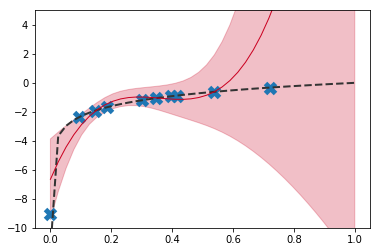

In [156]:
plt.plot(train_x, train_y, marker='x', linewidth=0, ms=10, mew=5)
plt.plot(test_x, test_y, linewidth=2, linestyle='--', c='#333333')
average_y = np.average(predict_y, axis=1)
std_y = np.std(predict_y, axis=1)

plt.fill_between(test_x, average_y-std_y, average_y+std_y, color='#ca0020', alpha=0.25)
plt.plot(test_x, average_y, linewidth=1, linestyle='-', c='#ca0020')
plt.gca().set_ylim(-10, 5)

### Example: Seeing The Forest for the Trees

A variant of this is a __Random Forest__ where not only are subsets of data considered but, a subset of features is also used to split the data using decision trees.

#### Decision Tree

* Splits the domain up based on optimal axis-aligned cuts, and builds models on either side.
* Stops when leaves are too small or fit is "good enough"
* Let's talk about it [over here](https://www.cs.utah.edu/~maljovec/files/partitionBasedRegression.pdf)

#### Random Forest

 * A collection of decision trees where each is built using:
    * A subset of data points (like traditional bagging)
    * A subset of dimensions

#### Example:

## Boosting

 * Reduces bias (underfitting)
 * More accurate, but also can overfit
 
Data is reweighted after each subsequent model is fit in order to attempt to better fit data that is mis-classified or predicted with the largest error in the regression setting.
 
 

(-10, 5)

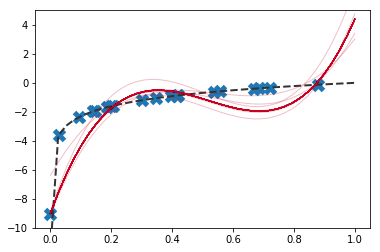

In [267]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

def test_function(x):
    return np.log(x)

np.random.seed(1)
num_samples = 20
num_models = 100
degree = 3
train_x = np.random.rand(num_samples)
train_x = train_x.reshape(-1, 1)
sample_weights = np.ones(num_samples)
train_y = test_function(train_x)

test_x = np.linspace(1e-5, 1, 40)
test_y = test_function(test_x)

plt.plot(train_x, train_y, marker='x', linewidth=0, ms=10, mew=5)
plt.plot(test_x, test_y, linewidth=2, linestyle='--', c='#333333')

predict_y = np.zeros((len(test_x), num_models))
stage = np.zeros(num_models)

for i in range(num_models):
    weak_learner = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    weak_learner.fit(train_x, train_y, **{'linearregression__sample_weight':sample_weights})

    predict_y[:, i] = weak_learner.predict(test_x.reshape(-1, 1)).T
    
    predict_train_y = weak_learner.predict(train_x)
    
    # This is adapted from: https://machinelearningmastery.com/boosting-and-adaboost-for-machine-learning/ for a regression model
    training_error = (train_y - predict_train_y).flatten()
    error = np.sqrt(np.sum(sample_weights*(training_error**2))/np.sum(sample_weights))
#     error = sum(sample_weights * training_error.flatten()) / sum(sample_weights)
    stage[i] = np.log((1-error) / error)
    
    sample_weights = sample_weights * np.exp(stage[i] * training_error.flatten())

    plt.plot(test_x, predict_y[:, i], linewidth=1, linestyle='-', c='#ca0020', alpha=0.25)

plt.gca().set_ylim(-10, 5)



(-10, 5)

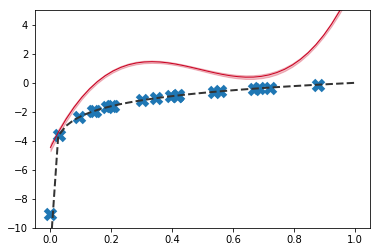

In [269]:
plt.plot(train_x, train_y, marker='x', linewidth=0, ms=10, mew=5)
plt.plot(test_x, test_y, linewidth=2, linestyle='--', c='#333333')
# average_y = np.average(predict_y, axis=1)
average_y = np.average(predict_y, weights=stage, axis=1)
std_y = np.std(predict_y, axis=1)

plt.fill_between(test_x, average_y-std_y, average_y+std_y, color='#ca0020', alpha=0.25)
plt.plot(test_x, average_y, linewidth=1, linestyle='-', c='#ca0020')
plt.gca().set_ylim(-10, 5)

### Adaboost

* Sensitive to noise and outliers
* Can use any type of learners, but historically decision "stumps" were used.

"Adaptive boosting" - The idea here is to boost the influence of the samples that are poorly fit (mis-classified in the classification setting). Thus, the next weak learner will fit those points better. When combining the models, you weight the models based on how good they fit the data, therefore we are "boosting" the good models, too.

#### Example Illustration

<img src="https://www.analyticsvidhya.com/wp-content/uploads/2015/11/bigd.png"/> Image courtesy of Analytics Vidhya

#### Example Code

/home/maljovec/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


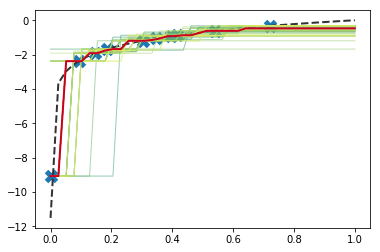

In [312]:
from sklearn.ensemble import AdaBoostRegressor

np.random.seed(1)
num_samples = 10
num_models = 100
degree = 3
train_x = np.random.rand(num_samples)
train_x = train_x.reshape(-1, 1)
train_y = test_function(train_x)

test_x = np.linspace(1e-5, 1, 40)
test_x = test_x.reshape(-1,1)
test_y = test_function(test_x)

plt.plot(train_x, train_y, marker='x', linewidth=0, ms=10, mew=5)
plt.plot(test_x, test_y, linewidth=2, linestyle='--', c='#333333')

model = AdaBoostRegressor()
model.fit(train_x, train_y)

cm = pylab.get_cmap('summer')
for i, estimator in enumerate(model.estimators_):
    predict_y = estimator.predict(test_x)
    color = cm(1.*i/len(model.estimators_))
    plt.plot(test_x, predict_y, linewidth=1, linestyle='-', c=color, alpha=0.5)
    
predict_y = model.predict(test_x)
plt.plot(test_x, predict_y, linewidth=2, linestyle='-', c='#ca0020')

### Gradient Boosting

Sequentially build models, where the next model fits on the residual of the previous model.

> $H_0(x) = \mu_y$
>
> $H_1(x) = H_0(x) + A$

We want $H_1(x) \approx y$, so we can create $A$ by computing the residual of $H_0$:

> $y = H_0(x) + A$
>
> $y - H_0(x) = A$
>
> $H_1(x) = H_0(x) + y - H_0(x)$

Note, the residual ($y - H_0(x)$) is the gradient of the squared loss function. In theory, you can replace the residual with the gradient of any loss function.

/home/maljovec/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


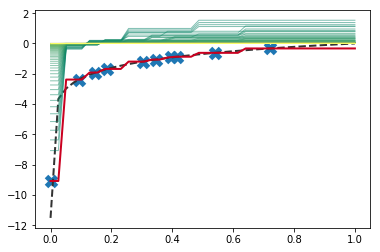

In [310]:
from sklearn.ensemble import GradientBoostingRegressor
from matplotlib import pylab

np.random.seed(1)
num_samples = 10
num_models = 100
degree = 3
train_x = np.random.rand(num_samples)
train_x = train_x.reshape(-1, 1)
train_y = test_function(train_x)

test_x = np.linspace(1e-5, 1, 40)
test_x = test_x.reshape(-1,1)
test_y = test_function(test_x)

plt.plot(train_x, train_y, marker='x', linewidth=0, ms=10, mew=5)
plt.plot(test_x, test_y, linewidth=2, linestyle='--', c='#333333')

model = GradientBoostingRegressor()
model.fit(train_x, train_y)

cm = pylab.get_cmap('summer')
for i, estimator in enumerate(model.estimators_):
    predict_y = estimator[0].predict(test_x)
    color = cm(1.*i/len(model.estimators_))
    plt.plot(test_x, predict_y, linewidth=1, linestyle='-', c=color, alpha=0.5)
    
predict_y = model.predict(test_x)
plt.plot(test_x, predict_y, linewidth=2, linestyle='-', c='#ca0020')



## Stacking

Here we use a meta-classifier/meta-regressor that learns which of the base models to use.

Rather than averaging models, each model is fully relied on for a subset of the domain. This is most similar to the partition-based models we discussed at the beginning.

In [286]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import clone
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier

# Parameters
n_classes = 3
n_estimators = 12
cmap = plt.cm.RdYlBu
plot_step = 0.02  # fine step width for decision surface contours
plot_step_coarser = 0.5  # step widths for coarse classifier guesses
RANDOM_SEED = 13  # fix the seed on each iteration

# Load data
iris = load_iris()

plot_idx = 1

model = RandomForestClassifier(n_estimators=n_estimators)
pair = [0,1]
# We only take the two corresponding features
X = iris.data[:, pair]
y = iris.target

# Shuffle
idx = np.arange(X.shape[0])
np.random.seed(RANDOM_SEED)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

# Standardize
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

# Train
clf = clone(model)
clf = model.fit(X, y)

# Now plot the decision boundary using a fine mesh as input to a
# filled contour plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

# Build a coarser grid to plot a set of ensemble classifications
# to show how these are different to what we see in the decision
# surfaces. These points are regularly space and do not have a
# black outline
xx_coarser, yy_coarser = np.meshgrid(
    np.arange(x_min, x_max, plot_step_coarser),
    np.arange(y_min, y_max, plot_step_coarser))
Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                 yy_coarser.ravel()]
                                 ).reshape(xx_coarser.shape)


Automatically created module for IPython interactive environment


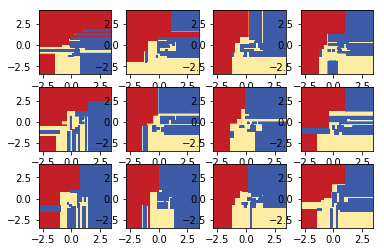

In [290]:
for i, tree in enumerate(model.estimators_, 1):
    Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.subplot(3, 4, i)
    cs = plt.contourf(xx, yy, Z, cmap=cmap)

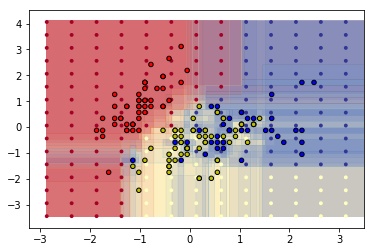

In [291]:
plt.figure()
# Choose alpha blend level with respect to the number
# of estimators
# that are in use (noting that AdaBoost can use fewer estimators
# than its maximum if it achieves a good enough fit early on)
estimator_alpha = 1.0 / len(model.estimators_)
for tree in model.estimators_:
    Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,
                        c=Z_points_coarser, cmap=cmap,
                        edgecolors="none")

# Plot the training points, these are clustered together and have a
# black outline
plt.scatter(X[:, 0], X[:, 1], c=y,
            cmap=ListedColormap(['r', 'y', 'b']),
            edgecolor='k', s=20)